In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import numpy as np
import seaborn as sns
plt.style.use("classic")

df = pd.read_csv (r'C:\Users\esteb\OneDrive\Escritorio\Maestría Analytics\Vacacional\Oil.csv', skiprows=2)
columnas=["ds", "y"]
df.columns=columnas
df["ds"] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
206,2021-03-01,29
207,2021-04-01,28
208,2021-05-01,29
209,2021-06-01,28
210,2021-07-01,48


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      211 non-null    datetime64[ns]
 1   y       211 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.4 KB


In [4]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [11]:
m1 = Prophet()
m1.fit(df)

future1 = m1.make_future_dataframe(periods=12, freq='m')
future1['ds']=future1['ds'] + pd.Timedelta(days=1)
future1.tail(6)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
217,2022-02-01
218,2022-03-01
219,2022-04-01
220,2022-05-01
221,2022-06-01
222,2022-07-01


In [12]:
forecast1 = m1.predict(future1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)

,ds,yhat,yhat_lower,yhat_upper
217,2022-02-01,30.594279,17.300372,43.066832
218,2022-03-01,32.765648,20.844937,46.205929
219,2022-04-01,32.636180,20.644174,45.010988
220,2022-05-01,34.963255,22.694866,47.611695
221,2022-06-01,36.555173,23.203673,48.880989
222,2022-07-01,34.044068,21.814246,46.559386


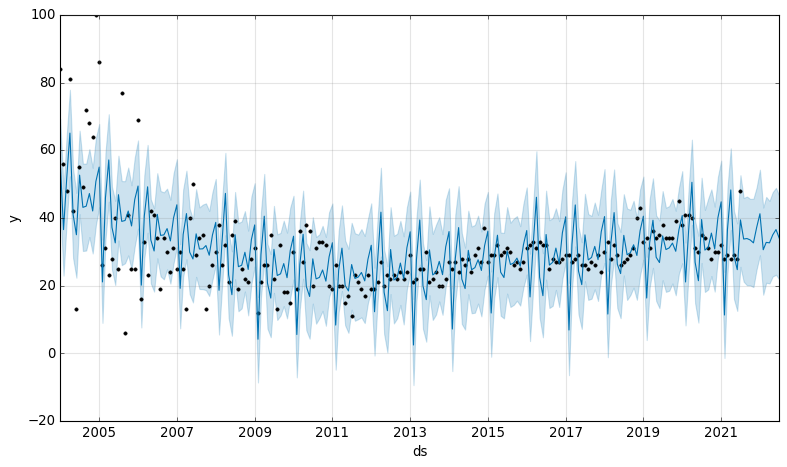

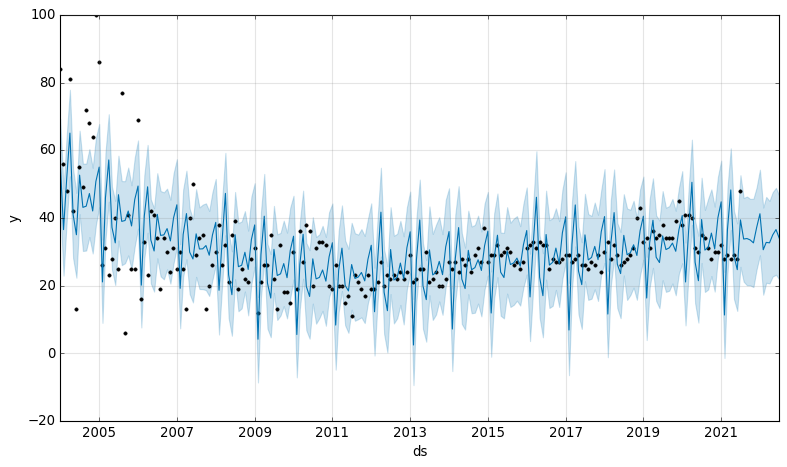

In [15]:

m1.plot(forecast1)

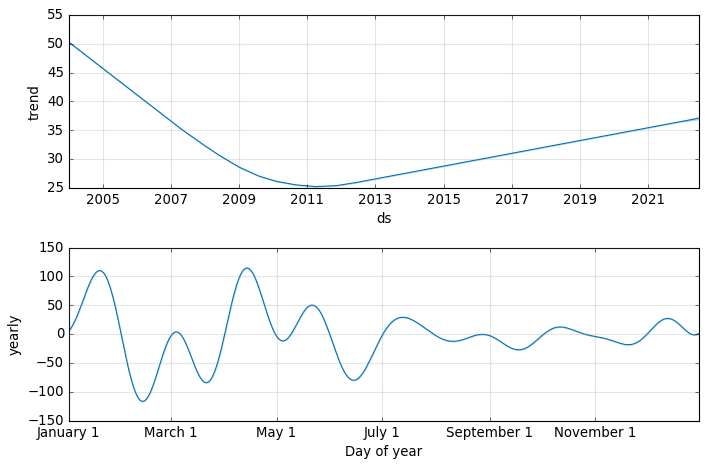

In [16]:

m1.plot_components(forecast1);

In [17]:
from fbprophet.diagnostics import cross_validation

In [18]:
data_cv1 = cross_validation(m1, horizon='360 days')
data_cv1.head()

INFO:fbprophet:Making 28 forecasts with cutoffs between 2007-03-17 00:00:00 and 2020-07-06 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2007-04-01,-28.876245,-46.666632,-10.850986,13,2007-03-17
1,2007-05-01,17.915390,0.180510,35.771104,40,2007-03-17
2,2007-06-01,38.081399,19.876795,55.833308,50,2007-03-17
3,2007-07-01,1.381455,-15.321204,20.991372,29,2007-03-17
4,2007-08-01,13.025608,-3.754119,31.661688,34,2007-03-17


In [19]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

performance_metrics(data_cv1)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,167.909356,12.957984,9.206930,0.414743,0.299267,0.848485
1,39 days,168.857738,12.994527,9.313589,0.422097,0.325553,0.848485
2,41 days,162.323383,12.740619,8.873889,0.408808,0.299267,0.848485
3,42 days,161.371158,12.703195,8.783042,0.402716,0.282672,0.848485
4,45 days,169.832900,13.031995,9.195743,0.412380,0.299267,0.848485
...,...,...,...,...,...,...,...
207,354 days,200.465503,14.158584,10.927344,0.459180,0.343236,0.666667
208,355 days,186.155301,13.643874,10.468395,0.456909,0.343236,0.712121
209,358 days,187.588937,13.696311,10.615461,0.464747,0.349989,0.727273
210,359 days,191.272067,13.830115,10.904628,0.464775,0.343236,0.727273


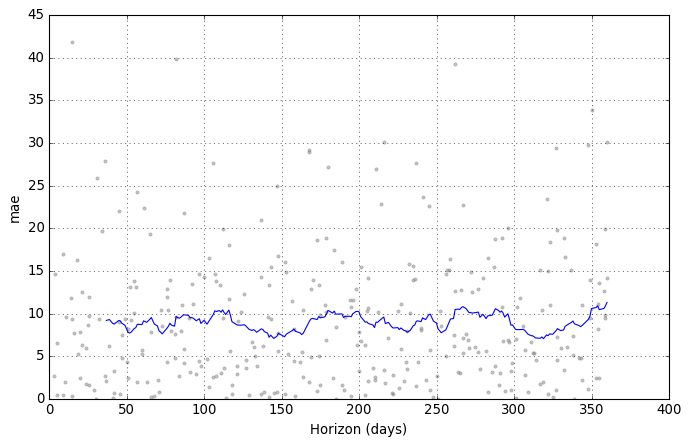

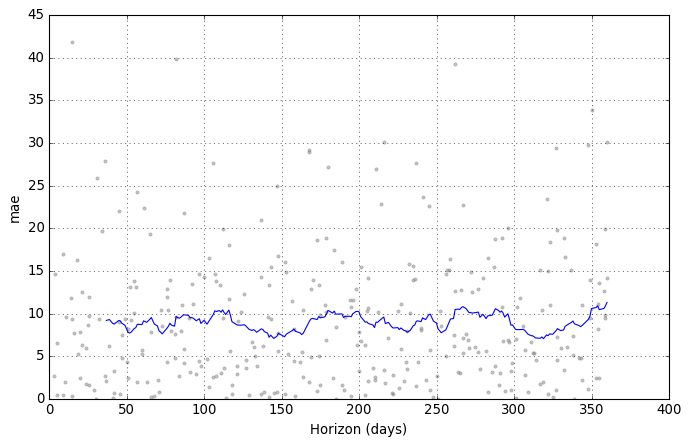

In [20]:
plot_cross_validation_metric(data_cv1, metric='mae')